## PyTorch Tutorial 07 - Linear Regression
https://www.youtube.com/watch?v=YAJ5XBwlN4o

In [2]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop 
    #- forward pass: compute prediction
    #- backward pass: gradients
    #- update weights

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data

# 1) model
# 2) loss and optimizer
# 3) training loop


epoch: 10, loss = 4287.3062
epoch: 20, loss = 3200.5012
epoch: 30, loss = 2414.2307
epoch: 40, loss = 1844.7753
epoch: 50, loss = 1431.9382
epoch: 60, loss = 1132.3682
epoch: 70, loss = 914.8035
epoch: 80, loss = 756.6726
epoch: 90, loss = 641.6561
epoch: 100, loss = 557.9432


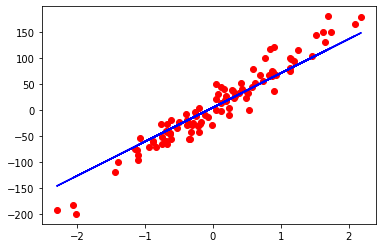

In [13]:
# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, 
                                            noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# we ant to make it column vector
y = y.view(y.shape[0], 1) # reshaping


n_samples, n_features = X.shape
learning_rate = 0.01

# 1) model
input_size = n_features
output_size = 1 #one value for each sample
model = nn.Linear(input_size, output_size)



# 2) loss and optimizer
criterion = nn.MSELoss()  #use inlbuilt loss function
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty the gradiets
    optimizer.zero_grad()
    
    # print info
    if (epoch + 1)%10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

        
# plot
predicted = model(X).detach().numpy() # we want to detach from computational graph (because gradient is enabled)
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
